In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datasets import load_dataset

In [2]:
dataset=load_dataset("stanfordnlp/imdb")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

plain_text/train-00000-of-00001.parquet:   0%|          | 0.00/21.0M [00:00<?, ?B/s]

plain_text/test-00000-of-00001.parquet:   0%|          | 0.00/20.5M [00:00<?, ?B/s]

plain_text/unsupervised-00000-of-00001.p(…):   0%|          | 0.00/42.0M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

In [3]:
#extract the data from the dataset and store
train_df=pd.DataFrame(dataset["train"])
test_df=pd.DataFrame(dataset["test"])

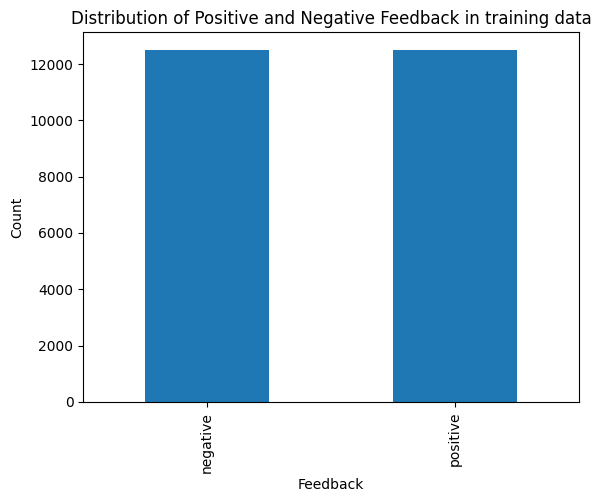

In [4]:
#plotting a bar graph for positive(1) and negative feedback(0) from the labels column, assign the 1 as positive and 0 as negative in graph
train_df["label"].value_counts().plot(kind="bar")
plt.xticks(
    ticks=[1,0],
  labels=["positive","negative"]
)
plt.title("Distribution of Positive and Negative Feedback in training data")
plt.xlabel("Feedback")
plt.ylabel("Count")
plt.show()


The above graph shows that the distribution of the :

*  negative feedback denoted by 0 in the data
*  postive feedback denoted by 1 in the data

***In the Training Data***

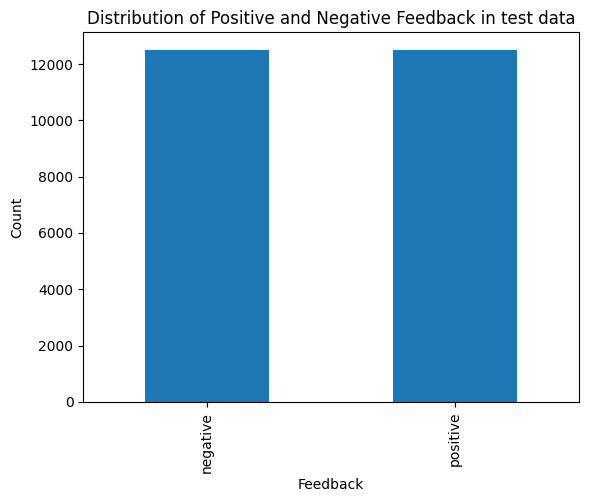

In [5]:
test_df["label"].value_counts().plot(kind="bar")
plt.xticks(
    ticks=[1,0],
  labels=["positive","negative"]
)
plt.title("Distribution of Positive and Negative Feedback in test data")
plt.xlabel("Feedback")
plt.ylabel("Count")
plt.show()


This is the distribution of **Test Data** in the similiar way.
From comparing the above 2 graphs we can conclude that :

*   both the training and testing datasets proper distribution of both type of reviews
*  both the training and testing data is not inclined towards any sentiment that causes less efficinecy in training the model.



In [6]:
!pip install emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 608.4/608.4 kB 14.7 MB/s eta 0:00:00


In [7]:

import re
import string
import nltk
from textblob import TextBlob
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import emoji


In [8]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [9]:
#function to remove emojis
def remove_emojis(text):

    return emoji.replace_emoji(text, replace='')

In [10]:
#function to remove punctuations
def remove_punc(text):
  punctuation=string.punctuation
  for p in punctuation:
    text=text.replace(p,"")
    return text

In [11]:
stopw=stopwords.words('english')

In [12]:
#function to remove stopwords
def remove_stopw(text):
  new_text=[]
  for w in str(text).split():
    if w.lower() not in stopw:
      new_text.append(w)
  return " ".join(new_text)

In [13]:
HTML_RE = re.compile(r'<.*?>')
URL_RE = re.compile(r'https?://\S+|www\.\S+')

In [14]:
#function to remove html tags
def remove_html(text):

  return HTML_RE.sub(r'',text)

In [15]:
#function to remove urls
def remove_urls(text):
  return URL_RE.sub(r'',text)
  return text

In [ ]:
#function to correct the spelling
def correct_w(text):
   txt=TextBlob(text)
   text=txt.correct().string
   return text

In [16]:
#whole one function compiled for text preprocessing
def text_preprocess(text):
  text=remove_emojis(text)
  text=remove_punc(text)
  text=remove_html(text)
  text=remove_urls(text)
  text=remove_stopw(text)

  return text

In [17]:

train_df_clean=train_df.copy().sample(25000)
test_df_clean=test_df.copy().sample(25000)
train_df_clean["text"]=train_df_clean["text"].apply(text_preprocess)
test_df_clean["text"]=test_df_clean["text"].apply(text_preprocess)


In [18]:
train_df_clean

,text,label
9672,"ended watching movie even going reviews, reque...",0
22809,one glad see Jim Carrey film top goal. charact...,1
9136,"""The Leap Years"" movie adapted e-novella Singa...",0
21105,Tis farly typical Tom Jerry short-a situation ...,1
19767,"serials go ""Zorro's Fighting Legion"" one best ...",1
...,...,...
11487,"noticed ""Fire"" cable night began watching reca...",0
14092,"someone else already said here, every scene fi...",1
20336,"could agree less rating given movie, believe s...",1
9590,James Bishop (Matt Stasi) goes `mental illness...,0


In [19]:
def number_of_words(text):
  lst=text.split(' ')
  number=len(lst)
  return number

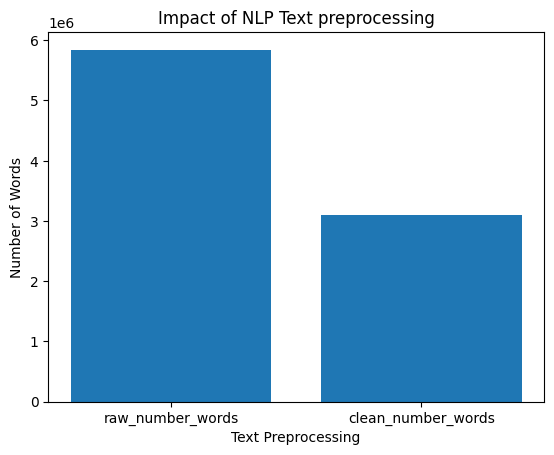

In [20]:
#to plot the bar grpah for number of words in preprocessed dataset and raw dataset.
# Calculate the total number of words in the 'text' column for the raw dataframe
raw_number_words = train_df["text"].apply(number_of_words).sum()

# Calculate the total number of words in the 'text' column for the clean dataframe
clean_number_words = train_df_clean["text"].apply(number_of_words).sum()

plt.bar(x=["raw_number_words","clean_number_words"],height=[raw_number_words,clean_number_words])
plt.title("Impact of NLP Text preprocessing")
plt.xlabel("Text Preprocessing")
plt.ylabel("Number of Words")
plt.show()

This shows the impact of the doing the *text preprocessing* of the reviews and due to this it makes the model training and predictions more efficient.

In [21]:
from transformers import AutoTokenizer
tokenizer=AutoTokenizer.from_pretrained("distilbert-base-uncased")

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [22]:
def tokenize_process(examples):
  return tokenizer(examples["text"],truncation=True)

In [23]:
from datasets import Dataset

# Convert pandas DataFrames to Hugging Face Dataset objects
hf_train_dataset = Dataset.from_pandas(train_df_clean)
hf_test_dataset = Dataset.from_pandas(test_df_clean)


tokenized_train = hf_train_dataset.map(tokenize_process, batched=True)
tokenized_test = hf_test_dataset.map(tokenize_process, batched=True)

Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

In [42]:
train_df_clean

,text,label
9672,"ended watching movie even going reviews, reque...",0
22809,one glad see Jim Carrey film top goal. charact...,1
9136,"""The Leap Years"" movie adapted e-novella Singa...",0
21105,Tis farly typical Tom Jerry short-a situation ...,1
19767,"serials go ""Zorro's Fighting Legion"" one best ...",1
...,...,...
11487,"noticed ""Fire"" cable night began watching reca...",0
14092,"someone else already said here, every scene fi...",1
20336,"could agree less rating given movie, believe s...",1
9590,James Bishop (Matt Stasi) goes `mental illness...,0


In [43]:
train_tokenized_df=tokenized_train.to_pandas()
test_tokenized_df=tokenized_test.to_pandas()
train_tokenized_df

,text,label,__index_level_0__,input_ids,attention_mask
0,"ended watching movie even going reviews, reque...",0,9672,"[101, 3092, 3666, 3185, 2130, 2183, 4391, 1010...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
1,one glad see Jim Carrey film top goal. charact...,1,22809,"[101, 2028, 5580, 2156, 3958, 12385, 3240, 214...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
2,"""The Leap Years"" movie adapted e-novella Singa...",0,9136,"[101, 1000, 1996, 11679, 2086, 1000, 3185, 596...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
3,Tis farly typical Tom Jerry short-a situation ...,1,21105,"[101, 22320, 2521, 2135, 5171, 3419, 6128, 246...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
4,"serials go ""Zorro's Fighting Legion"" one best ...",1,19767,"[101, 28172, 2175, 1000, 1062, 29459, 1005, 10...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
...,...,...,...,...,...
24995,"noticed ""Fire"" cable night began watching reca...",0,11487,"[101, 4384, 1000, 2543, 1000, 5830, 2305, 2211...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
24996,"someone else already said here, every scene fi...",1,14092,"[101, 2619, 2842, 2525, 2056, 2182, 1010, 2296...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
24997,"could agree less rating given movie, believe s...",1,20336,"[101, 2071, 5993, 2625, 5790, 2445, 3185, 1010...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
24998,James Bishop (Matt Stasi) goes `mental illness...,0,9590,"[101, 2508, 3387, 1006, 4717, 2358, 21369, 100...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."


In [44]:
#will export the datasets used for fitting after preprocessing
train_tokenized_df.to_csv("train_tokenized_df.csv",index=False)
test_tokenized_df.to_csv("test_tokenized_df.csv",index=False)


In [24]:
from transformers import DataCollatorWithPadding
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

In [25]:
from transformers import AutoModelForSequenceClassification
model = AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=2)


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [36]:
!pip install evaluate
import numpy as np
import evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 4.6 MB/s eta 0:00:00


In [37]:
#function ot load accuracy and f1 score
def compute_metrics(eval_pred):
   load_accuracy = evaluate.load("accuracy")
   load_f1 = evaluate.load("f1")
   logits,labels=eval_pred
   predictions=np.argmax(logits,axis=-1)
   accuracy=load_accuracy.compute(predictions=predictions,references=labels)["accuracy"]
   f1=load_f1.compute(predictions=predictions,references=labels)["f1"]
   return {"accuracy":accuracy,"f1 score":f1}

In [28]:
from transformers import TrainingArguments,Trainer

In [29]:
training_args=TrainingArguments(
    output_dir="sentiment_analysis",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=2,
    weight_decay=0.01,
    save_strategy="epoch",
    report_to="none"
)

In [39]:
trainer=Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train,
    eval_dataset=tokenized_test,
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
)

/tmp/ipython-input-1473923156.py:1: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer=Trainer(


In [31]:
trainer.train()

Step,Training Loss
500,0.366600
1000,0.283500
1500,0.255700
2000,0.188900
2500,0.166400
3000,0.179900


TrainOutput(global_step=3126, training_loss=0.23728076998270708, metrics={'train_runtime': 2072.5769, 'train_samples_per_second': 24.125, 'train_steps_per_second': 1.508, 'total_flos': 5836604656119936.0, 'train_loss': 0.23728076998270708, 'epoch': 2.0})

In [32]:
from sklearn.metrics import accuracy_score,f1_score
import numpy as np

In [40]:
predictions=trainer.predict(tokenized_test)
logits=predictions.predictions
labels=predictions.label_ids
y_pred=np.argmax(logits,axis=1)
accuracy=accuracy_score(labels,y_pred)
f1=f1_score(labels,y_pred)
print(f"The accuracy score of this model is = {accuracy}")
print(f"The f1_score is = {f1}")

The accuracy score of this model is = 0.919
The f1_score is = 0.9197224975222993


*The accuracy of this text sentiment analysis model  is **91.90**
